## Getting a subset of a time series and creating a Scatter plot

Here you learn how to:

 1. plot a time series using dots (scatter plot)
 2. Get subset of time series data and plot them

First, some packages:

In [1]:
# These packages are necessary later on. Load all the packages in one place for consistency
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import datetime

Load the data:

In [2]:
#The path of the directory where all AMF data are
path_dir = Path.cwd()/'data'/'1'
name_of_site = 'CA-Obs_clean.csv.gz'
path_data = path_dir/name_of_site
path_data.resolve()
df_data = pd.read_csv(path_data, index_col='time',parse_dates=['time'])
df_data.head()

,WS,RH,TA,PA,WD,P,SWIN,LWIN,SWOUT,LWOUT,NETRAD,H,LE
time,,,,,,,,,,,,,
1997-01-01 00:30:00,2.988,73.036,-24.570,93.942,102.84,NaN,-0.14,213.39,0.01,214.83,-1.59,NaN,NaN
1997-01-01 01:00:00,2.671,73.146,-24.562,93.887,96.09,NaN,-0.03,216.73,0.03,215.03,1.64,NaN,NaN
1997-01-01 01:30:00,2.303,73.151,-24.431,93.934,112.34,NaN,0.24,223.46,0.02,215.91,7.77,NaN,NaN
1997-01-01 02:00:00,2.789,73.093,-24.379,93.917,109.16,NaN,-0.04,218.32,0.00,215.72,2.56,NaN,NaN
1997-01-01 02:30:00,2.274,73.140,-24.284,93.977,115.74,NaN,0.14,217.89,0.01,215.99,2.02,NaN,NaN


Plot the net all-wave radiation:

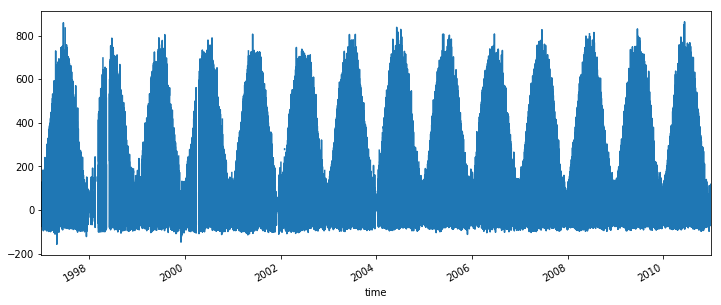

In [3]:
df_data['NETRAD'].plot(figsize=(12,5))

If you want to focus on a subset of the data, use this feature of `pandas` package (`DataFrame.loc[index1:index2]`):

In [4]:
df_sub=df_data.loc['2002 07 01':'2002 07 30']
df_sub.head()

,WS,RH,TA,PA,WD,P,SWIN,LWIN,SWOUT,LWOUT,NETRAD,H,LE
time,,,,,,,,,,,,,
2002-07-01 00:00:00,3.508,51.637,14.268,93.494,266.48,0.0,0.13,286.54,-0.20,361.24,-74.37,-3.451,0.175
2002-07-01 00:30:00,3.183,53.221,13.799,93.509,265.86,0.0,0.07,282.77,-0.23,358.10,-75.02,NaN,NaN
2002-07-01 01:00:00,3.759,55.664,13.182,93.506,266.07,0.0,-0.11,281.14,-0.14,356.13,-74.96,-14.770,1.628
2002-07-01 01:30:00,4.518,52.553,13.217,93.500,276.19,0.0,0.02,282.81,0.15,362.15,-79.47,-69.300,12.360
2002-07-01 02:00:00,3.940,52.343,13.150,93.484,275.58,0.0,-0.35,282.55,0.15,362.48,-80.43,-35.270,3.713


In [5]:
df_sub.index

DatetimeIndex(['2002-07-01 00:00:00', '2002-07-01 00:30:00',
               '2002-07-01 01:00:00', '2002-07-01 01:30:00',
               '2002-07-01 02:00:00', '2002-07-01 02:30:00',
               '2002-07-01 03:00:00', '2002-07-01 03:30:00',
               '2002-07-01 04:00:00', '2002-07-01 04:30:00',
               ...
               '2002-07-30 19:00:00', '2002-07-30 19:30:00',
               '2002-07-30 20:00:00', '2002-07-30 20:30:00',
               '2002-07-30 21:00:00', '2002-07-30 21:30:00',
               '2002-07-30 22:00:00', '2002-07-30 22:30:00',
               '2002-07-30 23:00:00', '2002-07-30 23:30:00'],
              dtype='datetime64[ns]', name='time', length=1440, freq=None)

We have a subset of `df_data` which contains the data from July 2002. Now let's plot it:

Text(0, 0.5, 'Temp ($\\degree$C)')

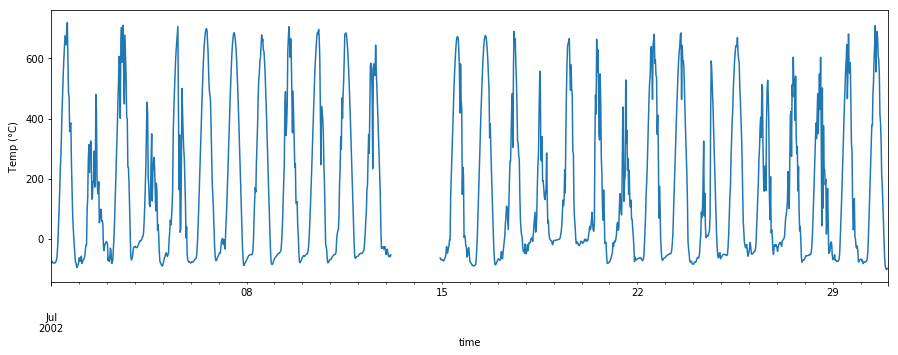

In [6]:
df_sub['NETRAD'].plot(figsize=(15,5))
plt.ylabel('Temp ($\degree$C)')

You can specify the date and time of interest in the subset:

Text(0, 0.5, 'Temp ($\\degree$C)')

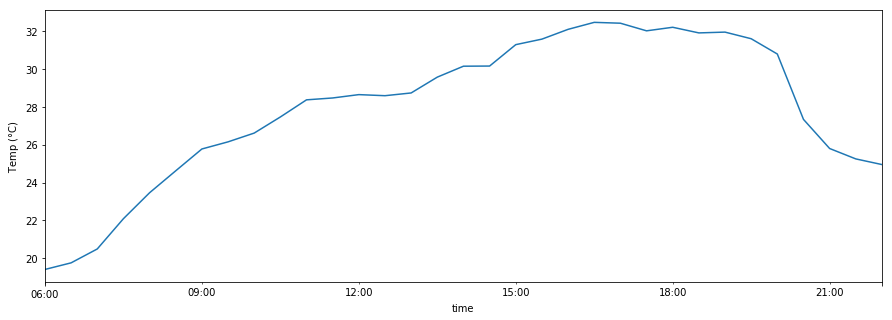

In [7]:
df_sub.loc['2002 07 12 6:00:00':'2002 07 12 22:00:00']['TA'].plot(figsize=(15,5))
plt.ylabel('Temp ($\degree$C)')

Sometimes we want to plot points instead of lines (e.g. if there are missing data, large variations in the data etc). To do this use `plt.scatter`:

Text(0, 0.5, 'Temp ($\\degree$C)')

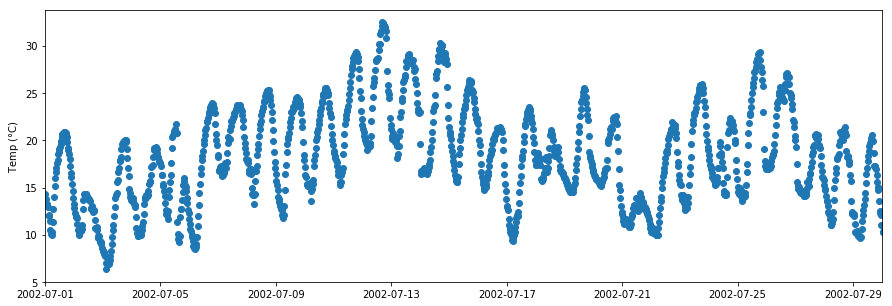

In [8]:
Y=df_sub['TA']
X=df_sub.index

fig,ax=plt.subplots(1,1,figsize=(15,5))
plt.scatter(X,Y)
plt.xlim([df_sub.index.date.min(),df_sub.index.date.max()])
plt.ylabel('Temp ($\degree$C)')

The marker color and style can be changed (different types of markers are shown [here](https://matplotlib.org/3.1.1/api/markers_api.html)):

Text(0, 0.5, 'Temp ($\\degree$C)')

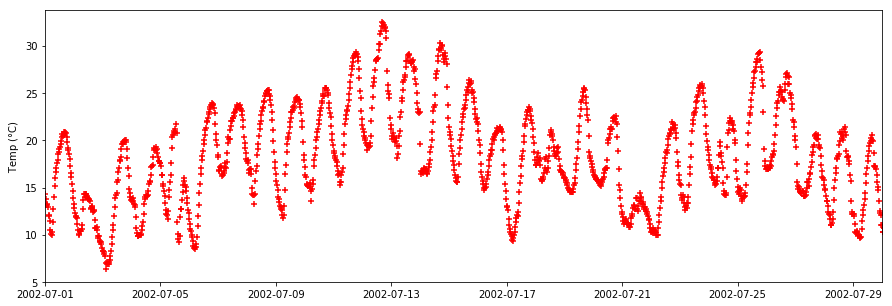

In [9]:
Y=df_sub['TA']
X=df_sub.index

fig,ax=plt.subplots(1,1,figsize=(15,5))
plt.scatter(X,Y,color='r',marker='+')
plt.xlim([df_sub.index.date.min(),df_sub.index.date.max()])
plt.ylabel('Temp ($\degree$C)')